Assume you are a team of machine learning engineers working for an ecommerce furniture shop, where users can browse and navigate interior furniture items. You are required to build a Furniture Recommender that allows users who have recently moved to explore furniture on your ecommerce system at ease. Your systems should have a functionality to help users navigate to the category of the furniture item that users want to buy. In most of the current online shops, users should type the name of the items and browse from the list of the results. However, to enhance the quality of the searching results, our system provides an image based searching function, where the users can upload the images of the furniture item that they are looking for. The system will accomplish an image search and return the list of similar-styled furniture in favor from our dataset.
In the Furniture dataset, there are 06 categories: beds - 6578 images; chairs - 22053 images; dressers - 7871 images; lamps - 32402 images; sofas - 4080 images; tables - 17100 images, with total of 90084 images. For every category, there are 17 interior styles:
- (a) Asian; (b) Beach; (c) Contemp; (d) Craftsman; (e) Eclectic; (f) Farmhouse; 
- (g) Industrial; (h) Media; (i) Midcentury; (j) Modern; (k) Rustic; (l) Scandinavian; 
- (m) Southwestern; (n) Traditional; (o) Transitional; (p) Tropical and (q) Victorian

You have three tasks in this project:
- **Task 1:** Classify images according to furniture category (beds; chairs; dressers; lamps; sofas; tables)
- **Task 2:** Recommend 10 furniture items in our dataset which is similar to the input furniture item image from users. You are required to define a metric of “similarity” between two furniture items.
- **Task 3:** (only for those aim HD) The extension of the model in Task 2, the recommended furniture items must be in the same interior styles with the style of the input images. In order to fulfill this task, you are required to build a model to recognize the style of a furniture item.

In [42]:
from PIL import Image
import pandas as pd
import os
import hashlib
import shutil
from pathlib import Path

In [17]:
dataset_folder = "../Data/Raw/Furniture_Data"

In [61]:
def convert_path_img(dataset):
    img_dir = Path(dataset)
    
    # get file path and labels
    filepaths = list(img_dir.glob(r'**/*.JPG')) + list(img_dir.glob(r'**/*.jpg')) + list(img_dir.glob(r'**/*.jpeg')) + list(img_dir.glob(r'**/*.PNG'))

    style = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    
    category = list(map(lambda x: os.path.split(os.path.split(os.path.split(x)[0])[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Img').astype(str)
    style = pd.Series(style, name='Style')
    category = pd.Series(category, name='Category')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, style, category], axis=1)
    return image_df

df = convert_path_img(dataset_folder)

In [62]:
df.head()

,Img,Style,Category
0,../Data/Raw/Furniture_Data/tables/Eclectic/402...,Eclectic,tables
1,../Data/Raw/Furniture_Data/tables/Eclectic/410...,Eclectic,tables
2,../Data/Raw/Furniture_Data/tables/Eclectic/388...,Eclectic,tables
3,../Data/Raw/Furniture_Data/tables/Eclectic/404...,Eclectic,tables
4,../Data/Raw/Furniture_Data/tables/Eclectic/417...,Eclectic,tables


In [64]:
df.to_csv('../Data/furnitureData.csv', index=False)

## EDA

For better data analysis and visualization, the dataframe is converted to .csv file

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90082 entries, 0 to 90081
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Img       90082 non-null  object
 1   Style     90082 non-null  object
 2   Category  90082 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


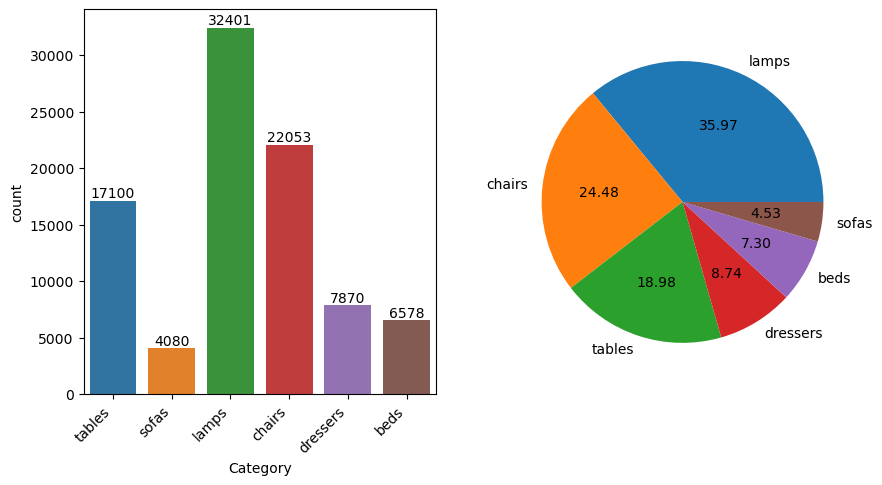

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.countplot(data=df, x='Category', ax=ax[0])
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    ha="right"
)
for c in ax1.containers:
    ax1.bar_label(c)
    
ax2 = plt.subplot(1, 2, 2)
styles_count = df['Category'].value_counts()
ax2.pie(styles_count, labels=styles_count.index, autopct='%.2f')

plt.show()

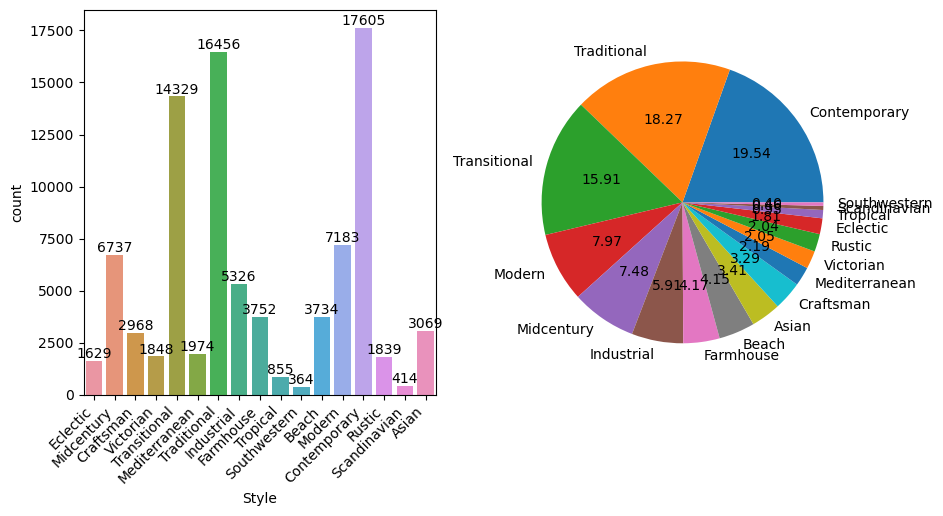

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.countplot(data=df, x='Style', ax=ax[0])
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    ha="right"
)
for c in ax1.containers:
    ax1.bar_label(c)
    
ax2 = plt.subplot(1, 2, 2)
styles_count = df['Style'].value_counts()
ax2.pie(styles_count, labels=styles_count.index, autopct='%.2f')

plt.show()

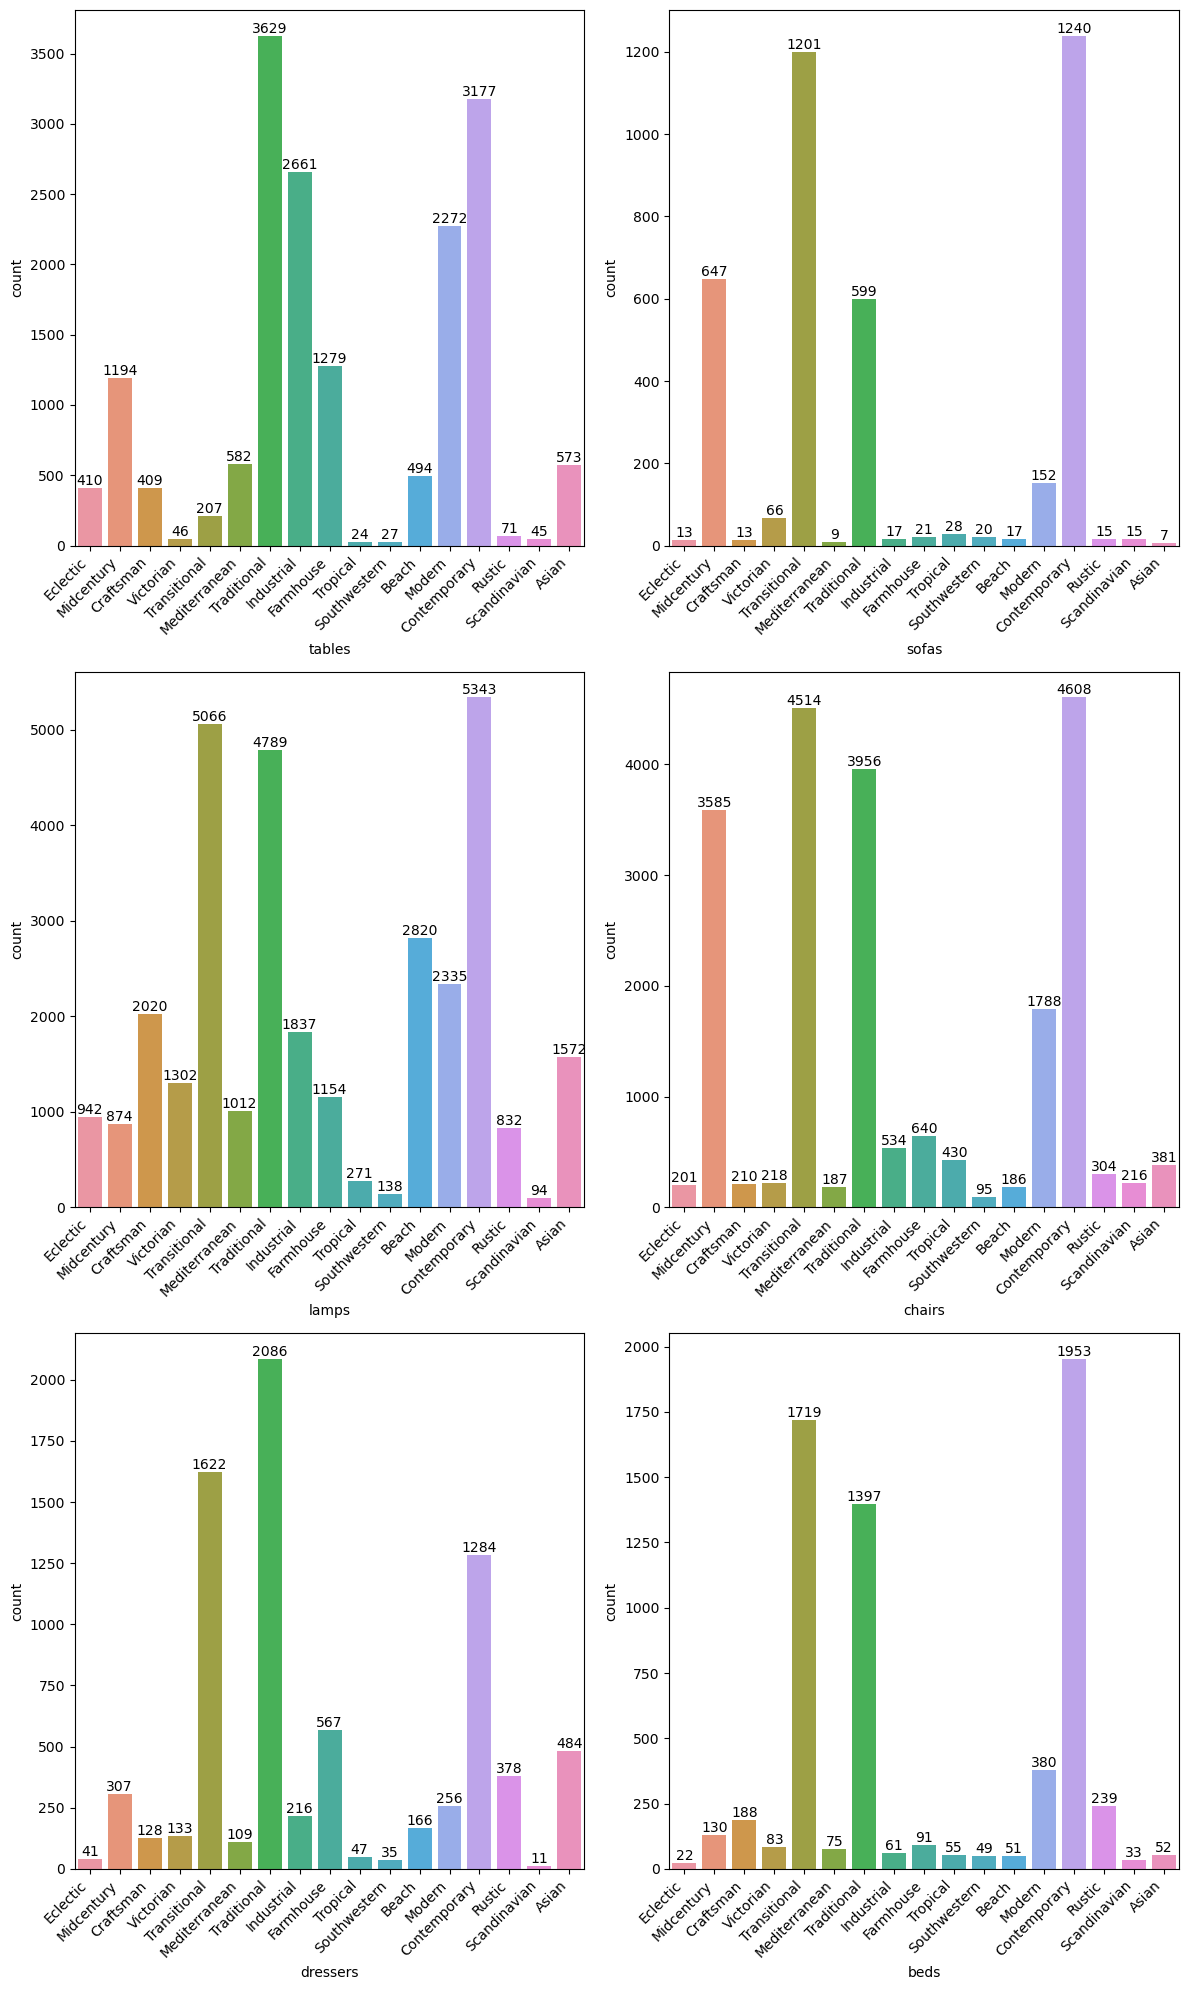

In [73]:
categories = df['Category'].unique()

fig, axs = plt.subplots(3, 2, figsize=(12, 20))
axs = axs.flatten()

for i, category in enumerate(categories):
    category_data = df[df['Category'] == category]
    
    row = i // 2
    col = i % 2
    
    ax = sns.countplot(data=category_data, x='Style', ax=axs[i])
    ax.set_xlabel(category)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right"
    )
    for c in ax.containers:
        ax.bar_label(c)

plt.tight_layout()
plt.show()

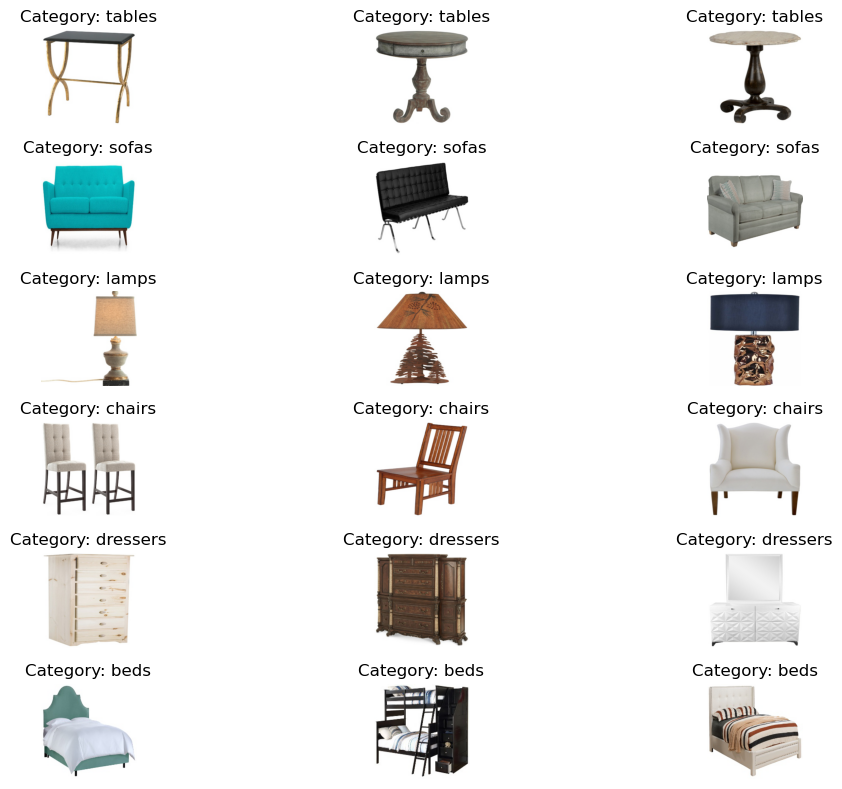

In [74]:
# Function to display sample images
def display_sample_images(df, num_images_per_category=3):
    unique_categories = df['Category'].unique()
    fig, axes = plt.subplots(len(unique_categories), num_images_per_category, figsize=(12, 8))

    for i, category in enumerate(unique_categories):
        category_images = df[df['Category'] == category]['Img'].sample(num_images_per_category, random_state=42)
        for j, (image, ax) in enumerate(zip(category_images, axes[i])):
            img = Image.open(image)
            ax.imshow(img)
            ax.set_title(f"Category: {category}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)